# Unsupervised Topic modelling

In [ ]:
! pip install --quiet bertopic==0.14.1
! pip install --quiet underthesea
! pip install --quiet pyLDAvis
! pip install --quiet top2vec
! pip install --quiet -U plotly==5.19.0
! pip install --quiet scipy==1.11.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from distutils.dir_util import copy_tree
copy_tree("/content/drive/MyDrive/Thesis: Topic Modelling/Code/utils", "./utils/")

['./utils/data_preprocessing.py', './utils/vietnamese-stopwords.txt']

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from underthesea import word_tokenize
from utils.data_preprocessing import *
import pyLDAvis
import pyLDAvis.gensim

with open("/content/drive/MyDrive/Thesis: Topic Modelling/Code/utils/vietnamese-stopwords.txt") as f:
    STOPWORDS = f.readlines()
    STOPWORDS = [remove_all_tag(i).strip() for i in STOPWORDS]
STOPWORDS.extend(["negative", "positive"])

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Thesis: Topic Modelling/Data/final_data_v6.xlsx")
data["comment"] = data["comment"].astype(str)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quality,Serve,Pack,Shipping,Price,Other,rating,comment
0,1,0,1,0,0,0,3,Chất lượng sản phẩm:được\n\nĐóng gói ko cẩn th...
1,1,0,0,1,0,0,4,Đúng với mô tả:đúng\nChất lượng sản phẩm:oke\n...
2,1,0,0,1,0,0,5,Nhận hàng nhanh\nHàng như ảnh\n*hình ảnh và vi...
3,1,0,0,1,1,0,4,"Mặc dù sản phẩm ổn, giá tốt nhưng chuẩn bị hàn..."
4,1,0,0,1,1,0,4,Chất liệu:lụa\nĐúng với mô tả:đúng\nMàu sắc:đe...


In [ ]:
data[data["Shipping"] == 1].iloc[3]["comment"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Chất liệu:lụa\nĐúng với mô tả:đúng\nMàu sắc:đen\n\n32k cho 1 chiếc váy quá ư là xinh, ê mà giao hàng lâu nha. 2 tuần trời lận, trừ 1 sao nhé'

# 1. Data preprocessing

In [ ]:
df = data.copy()
df["comment"] = df["comment"].apply(lambda x: cleaning(x))
data_words = list(df["comment"].apply(lambda x: word_tokenize(x)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df["comment"][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'chất lượng sản phẩm được đóng gói không cẩn thận'

# 2. LDA model

In [ ]:
data_words_without_stopwords = []
for reviews in data_words:
  new_reviews = [i.strip() for i in reviews if i.strip() not in STOPWORDS]
  data_words_without_stopwords.append(new_reviews)
dictionary = corpora.Dictionary(data_words_without_stopwords)
corpus = [dictionary.doc2bow(text) for text in data_words_without_stopwords]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models.ldamodel import LdaModel

lda = LdaModel(corpus, num_topics=10, id2word=dictionary, alpha='auto', passes=20, random_state = 80, iterations=150, per_word_topics=True, decay = 0.6)
topics = lda.print_topics(num_words=10)
for i, topic in enumerate(topics):
    print(i + 1, topic[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1 0.071*"mô tả" + 0.053*"chất liệu" + 0.052*"màu" + 0.049*"màu sắc" + 0.038*"vải" + 0.028*"áo" + 0.028*"mỏng" + 0.027*"đen" + 0.022*"hình ảnh" + 0.020*"xu"
2 0.055*"trả lời" + 0.051*"nhắn tin" + 0.046*"cửa hàng" + 0.032*"sai" + 0.032*"gửi" + 0.023*"đổi" + 0.020*"cửa hàng không" + 0.019*"tệ" + 0.018*"chán" + 0.016*"nấu"
3 0.050*"ok" + 0.038*"kém" + 0.034*"chất lượng" + 0.033*"tuyệt vời" + 0.030*"mô tả" + 0.029*"sản phẩm" + 0.024*"tư vấn" + 0.018*"nổi bật" + 0.018*"tính năng" + 0.015*"number_d"
4 0.310*"number_" + 0.009*"đi" + 0.009*"shope" + 0.009*"gửi" + 0.008*"giúp" + 0.007*"tặng" + 0.007*"number_k" + 0.006*"e" + 0.006*"goi" + 0.006*"đơn"
5 0.034*"da" + 0.025*"ngon" + 0.022*"mùi" + 0.021*"mẫu mã" + 0.020*"bao bì" + 0.012*"sữa" + 0.012*"hương vị" + 0.011*"hang" + 0.011*"lh" + 0.009*"chữ"
6 0.022*"dán" + 0.020*"chống" + 0.019*"the" + 0.016*"miếng" + 0.014*"móp" + 0.012*"dịch" + 0.011*"méo" + 0.010*"i" + 0.010*"mẹ" + 0.010*"b"
7 0.099*"dây" + 0.043*"đeo" + 0.026*"h" + 0.024*"bấm" + 0.024

Topic 2: Customer Service \\
Topic 5, 6: Packaging \\
Topic 1,3: Product quality \\
Topic 9: Price \\
Topic 10: Shipping and packaging \\


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.198721  0.115961       1        1  16.428150
1     -0.069270  0.009219       2        1   3.962663
2      0.033736  0.127818       3        1   4.260336
3     -0.075457 -0.278312       4        1   8.475898
4     -0.162702  0.107017       5        1   3.514892
5     -0.162060  0.098877       6        1   3.203445
6     -0.156740  0.084450       7        1   2.125611
7      0.012484 -0.262515       8        1  10.773074
8      0.036712 -0.010065       9        1   8.430199
9      0.344576  0.007550      10        1  38.825733, topic_info=         Term         Freq        Total Category  logprob  loglift
10    number_  5324.000000  5324.000000  Default  30.0000  30.0000
8        hàng  9078.000000  9078.000000  Default  29.0000  29.0000
6        giao  6758.000000  6758.000000  Default  28.0000  28.0000
4    cửa hàng  4425.000000  4425.000000  Default  27.0000  27.0000
2    sản phẩm  4034.000000  4034.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
177       kèm   214.772416   226.392708  Topic10  -5.7871   0.8934
584       thử   276.264468   320.116756  Topic10  -5.5353   0.7988
180      tặng   334.011407   448.702754  Topic10  -5.3455   0.6509
230      hình   373.455808   601.121661  Topic10  -5.2339   0.4701
95    shipper   241.163890   325.526015  Topic10  -5.6712   0.6461

[439 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1607      9  0.994428    LINK
1761      9  0.991720       a
3766      6  0.965211     are
1263      6  0.982927       b
164       5  0.990973  bao bì
...     ...       ...     ...
462      10  0.978414      ốp
22        1  0.008188      ổn
22        9  0.177417      ổn
22       10  0.814296      ổn
206      10  0.998413  ủng hộ

[528 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    rows = []
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                rows.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]))
            else:
                break
    sent_topics_df = pd.DataFrame(rows)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

def get_prob_features(model, corpus, thresh = 0.1):
  rows = []
  for i in range(len(corpus)):
    row = []
    probs = model[corpus[i]][0]
    for name, prob in probs:
      if prob and (prob > thresh):
        row.append(name)
    rows.append(row)
  return rows


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


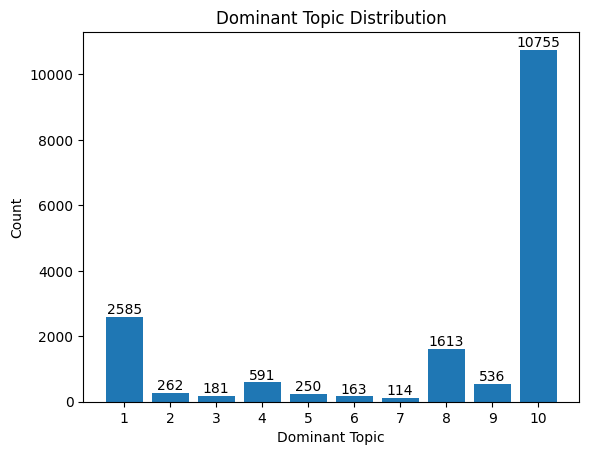

In [ ]:
# Topic distribution before grouping
dominant_topic_df = format_topics_sentences(lda, corpus, data["comment"])
count_topic = dominant_topic_df["Dominant_Topic"].value_counts().sort_index()
count_topic.index += 1
plt.bar(count_topic.index, count_topic.values)
for i in range(len(count_topic)):
    plt.text(count_topic.index[i], count_topic.values[i], count_topic.values[i], ha='center', va='bottom')
plt.xlabel("Dominant Topic")
plt.ylabel("Count")
plt.title("Dominant Topic Distribution")
plt.xticks(count_topic.index)
plt.show()

Topic 2: Customer Service \\
Topic 5, 6: Packaging \\
Topic 1,3: Product quality \\
Topic 9: Price \\
Topic 10: Shipping and packaging \\

In [ ]:
# Topic distribution After grouping
grouping_dict = {"Price": [8], "Pack": [4, 5], "Serve": [1], "Quality": [0,3], "Shipping and packaging": [10]}
dominant_topic_df["Topic_Quality"] = dominant_topic_df["Dominant_Topic"].apply(lambda x: 1 if x in grouping_dict["Quality"] else 0)
dominant_topic_df["Topic_Serve_Ship"] = dominant_topic_df["Dominant_Topic"].apply(lambda x: 1 if x in grouping_dict["Serve"] else 0)
dominant_topic_df["Topic_Price"] = dominant_topic_df["Dominant_Topic"].apply(lambda x: 1 if x in grouping_dict["Price"] else 0)
dominant_topic_df["Topic_Pack"] = dominant_topic_df["Dominant_Topic"].apply(lambda x: 1 if x in grouping_dict["Pack"] else 0)
dominant_topic_df["Topic_Ship_Pack"] = dominant_topic_df["Dominant_Topic"].apply(lambda x: 1 if x in grouping_dict["Shipping and packaging"] else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xu

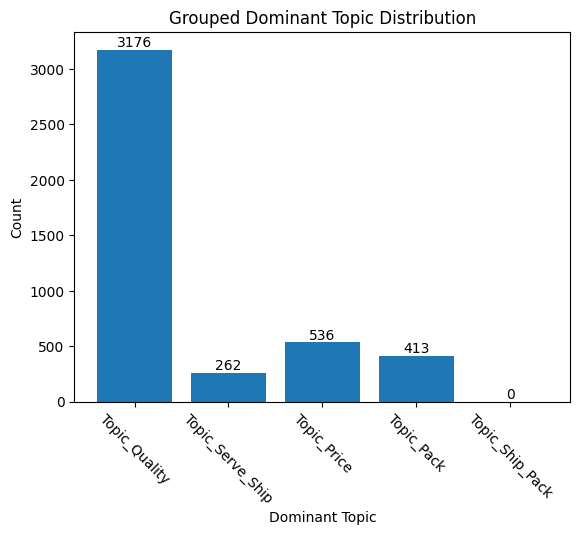

In [ ]:
grouped_count = dominant_topic_df[["Topic_Quality", "Topic_Serve_Ship", "Topic_Price", "Topic_Pack", "Topic_Ship_Pack"]].sum()
plt.bar(grouped_count.index, grouped_count.values)
for i in range(len(grouped_count)):
    plt.text(grouped_count.index[i], grouped_count.values[i], grouped_count.values[i], ha='center', va='bottom')
plt.xlabel("Dominant Topic")
plt.ylabel("Count")
plt.title("Grouped Dominant Topic Distribution")
plt.xticks(grouped_count.index, rotation = -45)
plt.show()

In [ ]:
# Set the label to 1 if the topic contributed more than 10% in each review
topics_docs = df.copy()
topics_docs["Topics"] = get_prob_features(lda, corpus)
topics_docs["predict_Serve"] = topics_docs["Topics"].apply(lambda x: 1 if set(x).intersection(grouping_dict["Serve"]) else 0)
topics_docs["predict_Shipping"] = topics_docs["Topics"].apply(lambda x: 1 if set(x).intersection(grouping_dict["Pack"]) else 0)
topics_docs["predict_Pack"] = topics_docs["Topics"].apply(lambda x: 1 if set(x).intersection(grouping_dict["Pack"]) else 0)
topics_docs["predict_Quality"] = topics_docs["Topics"].apply(lambda x: 1 if set(x).intersection(grouping_dict["Quality"]) else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
import pandas as pd

label_cols = ["Quality", "Pack", "Serve", "Shipping"]
predict_cols = ["predict_Quality", "predict_Pack", "predict_Serve", "predict_Shipping"]
print("Classification report from LDA model")
print('Hamming Loss: ', round(hamming_loss(topics_docs[label_cols], topics_docs[predict_cols]),2))
print(classification_report(topics_docs[label_cols],  topics_docs[predict_cols]))
for i in range(len(label_cols)):
  print(f"classification report of {label_cols[i]}")
  print(classification_report(topics_docs[label_cols[i]], topics_docs[predict_cols[i]]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification report from LDA model
Hamming Loss:  0.32
              precision    recall  f1-score   support

           0       0.78      0.56      0.65     13509
           1       0.31      0.21      0.25      3162
           2       0.54      0.39      0.45      2533
           3       0.34      0.10      0.16      6833

   micro avg       0.63      0.38      0.47     26037
   macro avg       0.49      0.32      0.38     26037
weighted avg       0.58      0.38      0.45     26037
 samples avg       0.48      0.38      0.40     26037

classification report of Quality
              precision    recall  f1-score   support

           0       0.19      0.38      0.25      3541
           1       0.78      0.56      0.65     13509

    accuracy                           0.52     17050
   macro avg       0.48      0.47      0.45     17050
weighted avg       0.65      0.52      0.57     17050

classification report of Pack
              precision    recall  f1-score   support

         

# 2.2. Evaluate LDA model

In [ ]:
print('\nPerplexity: ', lda.log_perplexity(corpus)) # lower perplexity = better
coherence_model_lda = CoherenceModel(model=lda, texts=data_words, dictionary=dictionary, topn = 10, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() # higher score = better
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.355060246350796

Coherence Score:  0.5050278351221876


# 3. Bertopic model

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from umap import UMAP

umap_model = UMAP(min_dist=0.0, metric='cosine', random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vectorizer_model = TfidfVectorizer(stop_words=STOPWORDS, tokenizer=word_tokenize, min_df = 0.2)
topic_model = BERTopic(vectorizer_model=vectorizer_model, language="multilingual", nr_topics="auto", umap_model=umap_model)
topics, probs = topic_model.fit_transform(df["comment"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
freq = topic_model.get_topic_info()
freq.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Count,Name
0,-1,5303,-1_number__mua_chất lượng_hàng
1,0,6814,0_chất lượng_hàng_đóng gói_sản phẩm
2,1,2436,1_màu sắc_chất liệu_đen_màu
3,2,1006,2_áo_vải_mặc_quần
4,3,438,3_number__cửa hàng_đơn_mua
5,4,172,4_nhắn tin_trả lời_cửa hàng không_cửa hàng
6,5,133,5_tính chất_hình ảnh_xu_video
7,6,124,6_pin_sạc_mau_đêm
8,7,92,7_shipper_ship_thái độ_hàng
9,8,89,8_chậm_giao_tiền_hàng


In [ ]:
# freq.to_excel("/content/bertopic_freq2.xlsx", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_model.visualize_barchart()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(df["comment"])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

100%|██████████| 20/20 [00:00<00:00, 108.24it/s]


In [ ]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, top_n_topics = 20, color_threshold = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# 4. Analyzing one specific product

## 4.1. Crawl data

In [ ]:
"""
PRODUCT_URL = "https://shopee.vn/Áo-Khoác-Nỉ-Nam-Dài-Tay-Khóa-Kéo-Có-Mũ-Trùm-Họa-Tiết-Chữ-K-Zenkonam-MEN-JK-034-i.16580423.17780338318?sp_atk=605f3f1e-1473-4b30-a98b-cbc525162774&xptdk=605f3f1e-1473-4b30-a98b-cbc525162774"
from Shopee_crawl import ShopeeCrawler
crawler = ShopeeCrawler()
shop_id, item_id = crawler.get_ids_from_link(PRODUCT_URL)
reviews = crawler.Crawl(item_id = item_id, shop_id = shop_id)
reviews_df = pd.DataFrame(reviews)
reviews_df = reviews_df[reviews_df['comment'].str.len() > 0]
reviews_df
reviews_df.to_excel("/content/drive/MyDrive/Thesis: Topic Modelling/Data/Ao_khoac.xlsx", index = False)
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'\nPRODUCT_URL = "https://shopee.vn/Áo-Khoác-Nỉ-Nam-Dài-Tay-Khóa-Kéo-Có-Mũ-Trùm-Họa-Tiết-Chữ-K-Zenkonam-MEN-JK-034-i.16580423.17780338318?sp_atk=605f3f1e-1473-4b30-a98b-cbc525162774&xptdk=605f3f1e-1473-4b30-a98b-cbc525162774"\nfrom Shopee_crawl import ShopeeCrawler\ncrawler = ShopeeCrawler()\nshop_id, item_id = crawler.get_ids_from_link(PRODUCT_URL)\nreviews = crawler.Crawl(item_id = item_id, shop_id = shop_id)\nreviews_df = pd.DataFrame(reviews)\nreviews_df = reviews_df[reviews_df[\'comment\'].str.len() > 0]\nreviews_df\nreviews_df.to_excel("/content/drive/MyDrive/Thesis: Topic Modelling/Data/Ao_khoac.xlsx", index = False)\n'

In [ ]:
reviews_df = pd.read_excel("/content/drive/MyDrive/Thesis: Topic Modelling/Data/Ao_khoac.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
reviews_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,itemid,shopid,username,rating,time,source,comment
0,16580423,17780338318,je_ni_fo_dat,5,1705481009,Shopee,Hài lòng về dich vụ và chất liệu sản phẩm rất ...
1,16580423,17780338318,_rodht825l,5,1659103218,Shopee,"Vải đẹp, áo khoác gió. Tránh mưa nắng được, mà..."
2,16580423,17780338318,ngo_ba_kien,5,1697112846,Shopee,"sản phẩm đẹp, chất liệu tốt, shop uy tín miễn ..."
3,16580423,17780338318,ngo_ba_kien,5,1705477000,Shopee,"shop giao hàng nhanh, gói hàng cẩn thận, sản p..."
4,16580423,17780338318,madmeowmeow,5,1675015660,Shopee,"Chất liệu:Tốt, mặc thoáng\nMàu sắc:Đẹp, mình đ..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<BarContainer object of 5 artists>

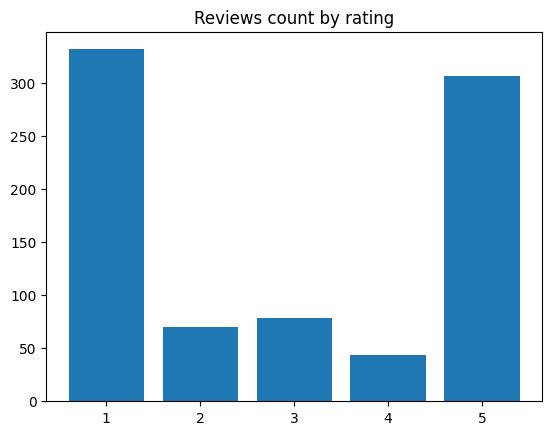

In [ ]:
reviews_count_by_rating = reviews_df.groupby("rating")["time"].count()
plt.title("Reviews count by rating")
plt.bar(x = reviews_count_by_rating.index, height = reviews_count_by_rating.values)

# 4.2 Preprocessing data

In [ ]:
clean_reviews_df = pd.DataFrame()
clean_reviews_df["comment"] = reviews_df["comment"].apply(lambda x: cleaning(x))
data_words = list(clean_reviews_df["comment"].apply(lambda x: word_tokenize(x)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
clean_reviews_without_stopwords = []
for reviews in data_words:
  new_reviews = [i.strip() for i in reviews if i.strip() not in STOPWORDS]
  clean_reviews_without_stopwords.append(new_reviews)

dictionary = corpora.Dictionary(clean_reviews_without_stopwords)
corpus = [dictionary.doc2bow(text) for text in clean_reviews_without_stopwords]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# 4.3 Choose optimal number of topics

In [ ]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit

    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, random_state = 60, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())

    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()

    return lm_list, c_v

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



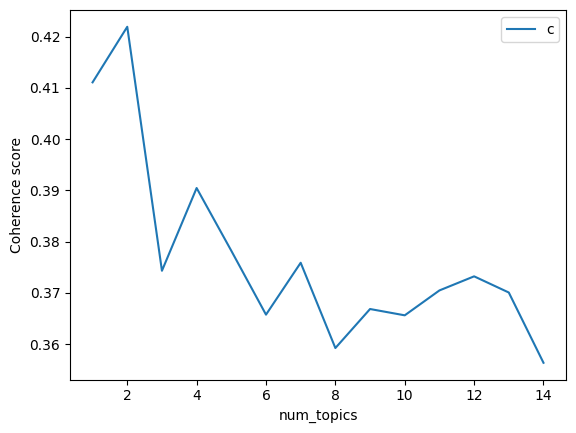

In [ ]:
evaluation = evaluate_graph(dictionary, corpus, texts = data_words, limit = 15)

In [ ]:
lda = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10, random_state = 60, per_word_topics=True, update_every=1, alpha = "auto")
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(0, '0.044*"hàng" + 0.035*"cửa hàng" + 0.027*"giao" + 0.025*"mua" + 0.022*"sản phẩm" + 0.021*"hình ảnh" + 0.020*"đẹp" + 0.017*"giá" + 0.014*"xu" + 0.013*"shop"')
(1, '0.083*"màu" + 0.052*"giao" + 0.038*"sai" + 0.031*"trắng" + 0.031*"hàng" + 0.029*"cửa hàng" + 0.026*"màu sắc" + 0.026*"vàng" + 0.025*"áo" + 0.025*"chất liệu"')
(2, '0.086*"mô tả" + 0.074*"chất liệu" + 0.071*"màu sắc" + 0.036*"áo" + 0.032*"trắng" + 0.032*"màu" + 0.021*"mỏng" + 0.020*"vải" + 0.018*"vàng" + 0.017*"đen"')


In [ ]:
topics=[]
topic_terms=[]
for idx in range(3):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda.get_topic_terms(idx,topn=10):
        terms.append(dictionary[term[0]])
    topic_terms.append(terms)

for idx in range(3):
    print(topics[idx],topic_terms[idx])

Topic 1 ['hàng', 'cửa hàng', 'giao', 'mua', 'sản phẩm', 'hình ảnh', 'đẹp', 'giá', 'xu', 'shop']
Topic 2 ['màu', 'giao', 'sai', 'trắng', 'hàng', 'cửa hàng', 'màu sắc', 'vàng', 'áo', 'chất liệu']
Topic 3 ['mô tả', 'chất liệu', 'màu sắc', 'áo', 'trắng', 'màu', 'mỏng', 'vải', 'vàng', 'đen']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Main topics in the reviews are related to product's color, material. Topic 2 may be related to the fact that customer received the product in wrong colors.

In [ ]:
print('\nPerplexity: ', lda.log_perplexity(corpus)) # lower perplexity = better
coherence_model_lda = CoherenceModel(model=lda, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() # higher score = better
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Perplexity:  -5.50106559932957

Coherence Score:  0.44797106757786936


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.163924  0.008735       1        1  20.543649
1     -0.068151 -0.082120       2        1  31.350350
2     -0.095773  0.073386       3        1  48.106001, topic_info=         Term        Freq       Total Category  logprob  loglift
142       màu  282.000000  282.000000  Default  30.0000  30.0000
39      mô tả  333.000000  333.000000  Default  29.0000  29.0000
62    màu sắc  289.000000  289.000000  Default  28.0000  28.0000
262       sai  120.000000  120.000000  Default  27.0000  27.0000
5        hàng  168.000000  168.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
3        giao   44.465545  193.645818   Topic3  -4.3016  -0.7396
5        hàng   41.370505  168.044251   Topic3  -4.3737  -0.6699
15   cửa hàng   27.953946  138.748485   Topic3  -4.7657  -0.8703
92    number_   19.638228   72.033701   Topic3  -5.1188  -0.5679
9    sản phẩm   17.411184   68.023446   Topic3  -5.2392  -0.6310

[206 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
153       1  0.937064            a
603       2  0.780297       ai ngờ
81        1  0.828967      biết ơn
253       3  0.815912           bt
436       3  0.932013  bình thường
...     ...       ...          ...
144       2  0.086903           ổn
144       3  0.753159           ổn
47        1  0.697813       ủng hộ
47        2  0.107356       ủng hộ
47        3  0.161034       ủng hộ

[250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])